# Raw Data Exploration

**This notebook should be run FIRST** before any preprocessing scripts.

## Objectives
1. Understand the structure of raw data files
2. Explore data coverage (countries, years, variables)
3. Identify data quality issues
4. Understand what preprocessing will be needed
5. Get familiar with the data before running the pipeline

## Raw Data Sources
- **FAO Food Balance Sheets**: Nutrition consumption data
- **FAO Population Data**: Demographic data
- **WHO Obesity Data**: Health outcome data

---


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set up paths
PROJECT_ROOT = Path().resolve().parent
RAW_DATA_DIR = PROJECT_ROOT / "data" / "raw"

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")
print(f"📁 Raw data directory: {RAW_DATA_DIR}")
print(f"   Exists: {RAW_DATA_DIR.exists()}")


✅ Libraries imported successfully!
📁 Raw data directory: /Users/subhammahapatra/Downloads/Projects/Bell-Labs/data/raw
   Exists: True


## 1. FAO Food Balance Sheet Data

This is the main nutrition dataset containing food consumption, nutrients, and supply data.


In [2]:
# Load FAO Food Balance Sheet data
fbs_file = RAW_DATA_DIR / "FoodBalanceSheet_data" / "FoodBalanceSheets_E_All_Data_(Normalized).csv"

if fbs_file.exists():
    print(f"📂 Loading: {fbs_file.name}")
    fbs_df = pd.read_csv(fbs_file, low_memory=False)
    print(f"✅ Loaded {len(fbs_df):,} rows, {len(fbs_df.columns)} columns")
    
    print("\n📋 Column Names:")
    print(list(fbs_df.columns))
    
    print("\n📊 Dataset Info:")
    print(f"   Shape: {fbs_df.shape}")
    print(f"   Memory usage: {fbs_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    print("\n🔍 First few rows:")
    display(fbs_df.head())
    
    print("\n📈 Data Types:")
    print(fbs_df.dtypes)
    
else:
    print(f"❌ File not found: {fbs_file}")
    fbs_df = None


📂 Loading: FoodBalanceSheets_E_All_Data_(Normalized).csv
✅ Loaded 4,820,497 rows, 14 columns

📋 Column Names:
['Area Code', 'Area Code (M49)', 'Area', 'Item Code', 'Item Code (FBS)', 'Item', 'Element Code', 'Element', 'Year Code', 'Year', 'Unit', 'Value', 'Flag', 'Note']

📊 Dataset Info:
   Shape: (4820497, 14)
   Memory usage: 2381.78 MB

🔍 First few rows:


,Area Code,Area Code (M49),Area,Item Code,Item Code (FBS),Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note
0,2,'004,Afghanistan,2501,'S2501,Population,511,Total Population - Both sexes,2010,2010,1000 No,28284.09,X,NaN
1,3,'008,Albania,2501,'S2501,Population,511,Total Population - Both sexes,2010,2010,1000 No,2928.72,X,NaN
2,2,'004,Afghanistan,2501,'S2501,Population,511,Total Population - Both sexes,2011,2011,1000 No,29347.71,X,NaN
3,3,'008,Albania,2501,'S2501,Population,511,Total Population - Both sexes,2011,2011,1000 No,2911.50,X,NaN
4,2,'004,Afghanistan,2501,'S2501,Population,511,Total Population - Both sexes,2012,2012,1000 No,30560.03,X,NaN



📈 Data Types:
Area Code            int64
Area Code (M49)     object
Area                object
Item Code            int64
Item Code (FBS)     object
Item                object
Element Code         int64
Element             object
Year Code            int64
Year                 int64
Unit                object
Value              float64
Flag                object
Note               float64
dtype: object


In [3]:
# Explore FAO data structure
if fbs_df is not None:
    print("=" * 70)
    print("FAO FOOD BALANCE SHEET - DATA EXPLORATION")
    print("=" * 70)
    
    # Clean column names for exploration
    fbs_df.columns = fbs_df.columns.str.strip()
    
    # Basic statistics
    print("\n📊 Coverage Statistics:")
    if 'Area' in fbs_df.columns:
        print(f"   Countries/Areas: {fbs_df['Area'].nunique()}")
        print(f"   Sample countries: {', '.join(fbs_df['Area'].unique()[:10])}")
    
    if 'Year' in fbs_df.columns:
        print(f"   Year range: {fbs_df['Year'].min()} - {fbs_df['Year'].max()}")
        print(f"   Unique years: {fbs_df['Year'].nunique()}")
    
    if 'Item' in fbs_df.columns:
        print(f"   Food items: {fbs_df['Item'].nunique()}")
        print(f"   Sample items: {', '.join(fbs_df['Item'].unique()[:10])}")
    
    if 'Element' in fbs_df.columns:
        print(f"   Elements (variables): {fbs_df['Element'].nunique()}")
        print(f"\n   Available elements:")
        for elem in sorted(fbs_df['Element'].unique()):
            count = len(fbs_df[fbs_df['Element'] == elem])
            print(f"     - {elem}: {count:,} rows")
    
    # Check for missing values
    print("\n🔍 Missing Values:")
    missing = fbs_df.isnull().sum()
    missing_pct = (missing / len(fbs_df) * 100).round(2)
    missing_df = pd.DataFrame({
        'Missing Count': missing,
        'Missing %': missing_pct
    })
    missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
    if len(missing_df) > 0:
        display(missing_df.head(10))
    else:
        print("   ✅ No missing values!")


FAO FOOD BALANCE SHEET - DATA EXPLORATION

📊 Coverage Statistics:
   Countries/Areas: 213
   Sample countries: Afghanistan, Albania, Algeria, Angola, Antigua and Barbuda, Argentina, Armenia, Australia, Austria, Azerbaijan
   Year range: 2010 - 2023
   Unique years: 14
   Food items: 120
   Sample items: Population, Grand Total, Vegetal Products, Animal Products, Cereals - Excluding Beer, Wheat and products, Rice and products, Barley and products, Maize and products, Rye and products
   Elements (variables): 21

   Available elements:
     - Domestic supply quantity: 329,755 rows
     - Export quantity: 268,537 rows
     - Fat supply quantity (g/capita/day): 310,269 rows
     - Fat supply quantity (t): 310,269 rows
     - Feed: 114,828 rows
     - Food: 308,034 rows
     - Food supply (kcal): 310,263 rows
     - Food supply (kcal/capita/day): 310,263 rows
     - Food supply quantity (kg/capita/yr): 308,034 rows
     - Import quantity: 318,901 rows
     - Losses: 146,268 rows
     - Othe

,Missing Count,Missing %
Note,4820497,100.0


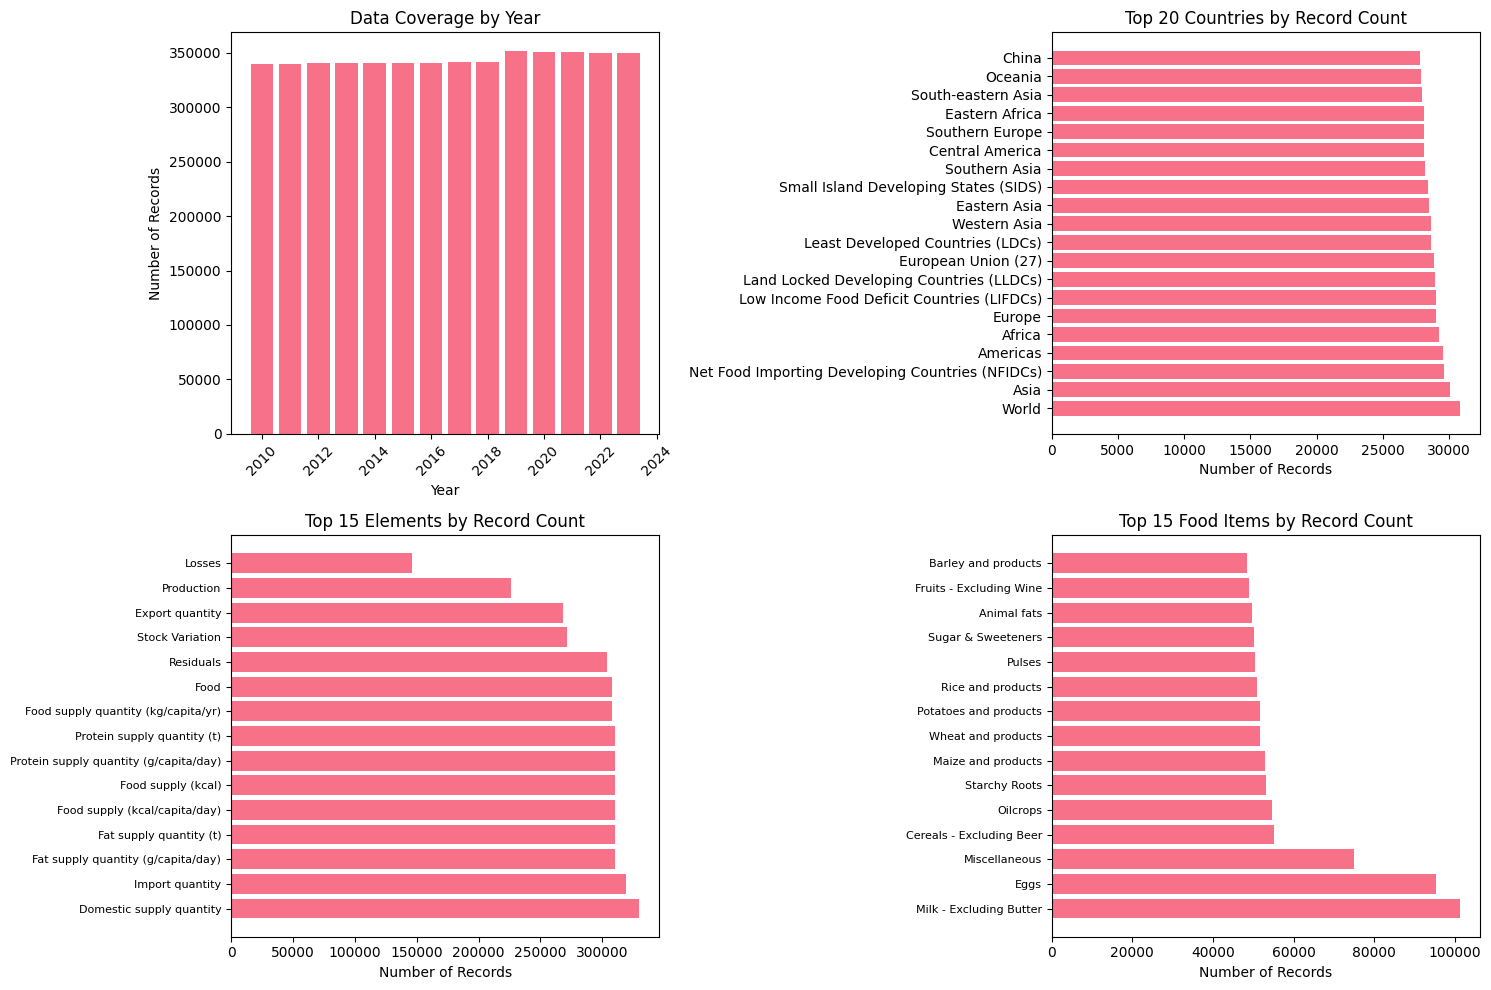

📊 Coverage visualizations created!


In [4]:
# Visualize FAO data coverage
if fbs_df is not None and 'Year' in fbs_df.columns:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Year distribution
    if 'Year' in fbs_df.columns:
        year_counts = fbs_df['Year'].value_counts().sort_index()
        axes[0, 0].bar(year_counts.index, year_counts.values)
        axes[0, 0].set_title('Data Coverage by Year')
        axes[0, 0].set_xlabel('Year')
        axes[0, 0].set_ylabel('Number of Records')
        axes[0, 0].tick_params(axis='x', rotation=45)
    
    # Top countries by record count
    if 'Area' in fbs_df.columns:
        country_counts = fbs_df['Area'].value_counts().head(20)
        axes[0, 1].barh(range(len(country_counts)), country_counts.values)
        axes[0, 1].set_yticks(range(len(country_counts)))
        axes[0, 1].set_yticklabels(country_counts.index)
        axes[0, 1].set_title('Top 20 Countries by Record Count')
        axes[0, 1].set_xlabel('Number of Records')
    
    # Element distribution
    if 'Element' in fbs_df.columns:
        element_counts = fbs_df['Element'].value_counts().head(15)
        axes[1, 0].barh(range(len(element_counts)), element_counts.values)
        axes[1, 0].set_yticks(range(len(element_counts)))
        axes[1, 0].set_yticklabels(element_counts.index, fontsize=8)
        axes[1, 0].set_title('Top 15 Elements by Record Count')
        axes[1, 0].set_xlabel('Number of Records')
    
    # Item distribution (top items)
    if 'Item' in fbs_df.columns:
        item_counts = fbs_df['Item'].value_counts().head(15)
        axes[1, 1].barh(range(len(item_counts)), item_counts.values)
        axes[1, 1].set_yticks(range(len(item_counts)))
        axes[1, 1].set_yticklabels(item_counts.index, fontsize=8)
        axes[1, 1].set_title('Top 15 Food Items by Record Count')
        axes[1, 1].set_xlabel('Number of Records')
    
    plt.tight_layout()
    plt.show()
    
    print("📊 Coverage visualizations created!")


## 2. FAO Population Data

Population data for calculating per-capita consumption rates.


In [5]:
# Load FAO Population data
pop_file = RAW_DATA_DIR / "Population_data" / "Population_E_All_Area_Groups_NOFLAG.csv"

if pop_file.exists():
    print(f"📂 Loading: {pop_file.name}")
    pop_df = pd.read_csv(pop_file, low_memory=False)
    print(f"✅ Loaded {len(pop_df):,} rows, {len(pop_df.columns)} columns")
    
    print("\n📋 Column Names:")
    print(list(pop_df.columns))
    
    print("\n🔍 First few rows:")
    display(pop_df.head())
    
    # Check for year columns (wide format)
    year_cols = [col for col in pop_df.columns if col.startswith('Y')]
    print(f"\n📅 Year columns found: {len(year_cols)}")
    if year_cols:
        print(f"   Year range: {year_cols[0]} to {year_cols[-1]}")
        print(f"   Sample years: {year_cols[:5]} ... {year_cols[-5:]}")
    
    # Check Element column
    if 'Element' in pop_df.columns:
        print(f"\n📊 Elements (population types):")
        print(pop_df['Element'].unique())
    
else:
    print(f"❌ File not found: {pop_file}")
    pop_df = None


📂 Loading: Population_E_All_Area_Groups_NOFLAG.csv
✅ Loaded 170 rows, 159 columns

📋 Column Names:
['Area Code', 'Area Code (M49)', 'Area', 'Item Code', 'Item', 'Element Code', 'Element', 'Unit', 'Y1950', 'Y1951', 'Y1952', 'Y1953', 'Y1954', 'Y1955', 'Y1956', 'Y1957', 'Y1958', 'Y1959', 'Y1960', 'Y1961', 'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969', 'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977', 'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985', 'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020', 'Y2021', 'Y2022', 'Y2023', 'Y2024', 'Y2025', 'Y2026', 'Y2027', 'Y2028', 'Y2029', 'Y2030', 'Y2031', 'Y2032', 'Y2033', 'Y2034', 'Y2035', 'Y2036', 'Y2037', 'Y2038', 'Y2

,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Unit,Y1950,Y1951,...,Y2091,Y2092,Y2093,Y2094,Y2095,Y2096,Y2097,Y2098,Y2099,Y2100
0,5000,'001,World,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1000 No,2493091.968,2536926.149,...,1.026586e+07,1.025941e+07,1.025218e+07,1.024418e+07,1.023540e+07,1.022585e+07,1.021555e+07,1.020449e+07,1.019269e+07,1.018016e+07
1,5000,'001,World,3010,Population - Est. & Proj.,512,Total Population - Male,1000 No,1241431.218,1263362.066,...,5.131697e+06,5.128089e+06,5.124074e+06,5.119654e+06,5.114828e+06,5.109606e+06,5.104004e+06,5.098020e+06,5.091673e+06,5.084974e+06
2,5000,'001,World,3010,Population - Est. & Proj.,513,Total Population - Female,1000 No,1251660.750,1273564.083,...,5.134164e+06,5.131318e+06,5.128109e+06,5.124531e+06,5.120575e+06,5.116243e+06,5.111544e+06,5.106468e+06,5.101014e+06,5.095185e+06
3,5000,'001,World,3010,Population - Est. & Proj.,551,Rural population,1000 No,1785371.783,1808749.089,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5000,'001,World,3010,Population - Est. & Proj.,561,Urban population,1000 No,750902.938,775067.697,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



📅 Year columns found: 151
   Year range: Y1950 to Y2100
   Sample years: ['Y1950', 'Y1951', 'Y1952', 'Y1953', 'Y1954'] ... ['Y2096', 'Y2097', 'Y2098', 'Y2099', 'Y2100']

📊 Elements (population types):
['Total Population - Both sexes' 'Total Population - Male'
 'Total Population - Female' 'Rural population' 'Urban population']


In [6]:
# Explore Population data structure
if pop_df is not None:
    print("=" * 70)
    print("FAO POPULATION DATA - DATA EXPLORATION")
    print("=" * 70)
    
    # Clean column names
    pop_df.columns = pop_df.columns.str.strip()
    
    print("\n📊 Coverage Statistics:")
    if 'Area' in pop_df.columns:
        print(f"   Countries/Areas: {pop_df['Area'].nunique()}")
        print(f"   Sample countries: {', '.join(pop_df['Area'].unique()[:10])}")
    
    if 'Element' in pop_df.columns:
        print(f"\n   Population types:")
        for elem in pop_df['Element'].unique():
            count = len(pop_df[pop_df['Element'] == elem])
            print(f"     - {elem}: {count} rows")
    
    # Check year columns
    year_cols = [col for col in pop_df.columns if col.startswith('Y')]
    if year_cols:
        print(f"\n   Year columns: {len(year_cols)}")
        print(f"   Year range: {year_cols[0]} ({year_cols[0].replace('Y', '')}) to {year_cols[-1]} ({year_cols[-1].replace('Y', '')})")
        
        # Check for missing values in year columns
        print(f"\n   Missing values in year columns:")
        missing_years = pop_df[year_cols].isnull().sum()
        if missing_years.sum() > 0:
            print(f"     Total missing: {missing_years.sum():,}")
            print(f"     Columns with most missing: {missing_years.nlargest(5).to_dict()}")
        else:
            print("     ✅ No missing values in year columns")
    
    print("\n⚠️  Note: Population data is in WIDE format (years as columns)")
    print("   It will be transformed to LONG format during preprocessing.")


FAO POPULATION DATA - DATA EXPLORATION

📊 Coverage Statistics:
   Countries/Areas: 34
   Sample countries: World, Africa, Eastern Africa, Middle Africa, Northern Africa, Southern Africa, Western Africa, Americas, Northern America, Central America

   Population types:
     - Total Population - Both sexes: 34 rows
     - Total Population - Male: 34 rows
     - Total Population - Female: 34 rows
     - Rural population: 34 rows
     - Urban population: 34 rows

   Year columns: 151
   Year range: Y1950 (1950) to Y2100 (2100)

   Missing values in year columns:
     Total missing: 3,610
     Columns with most missing: {'Y2051': 68, 'Y2052': 68, 'Y2053': 68, 'Y2054': 68, 'Y2055': 68}

⚠️  Note: Population data is in WIDE format (years as columns)
   It will be transformed to LONG format during preprocessing.


## 3. WHO Obesity Data

Health outcome data - obesity prevalence by country and year.


In [7]:
# Load WHO Obesity data
obesity_file = RAW_DATA_DIR / "data.csv"

if obesity_file.exists():
    print(f"📂 Loading: {obesity_file.name}")
    obesity_df = pd.read_csv(obesity_file, low_memory=False)
    print(f"✅ Loaded {len(obesity_df):,} rows, {len(obesity_df.columns)} columns")
    
    print("\n📋 Column Names:")
    print(list(obesity_df.columns))
    
    print("\n🔍 First few rows:")
    display(obesity_df.head())
    
    print("\n📈 Data Types:")
    print(obesity_df.dtypes)
    
else:
    print(f"❌ File not found: {obesity_file}")
    obesity_df = None


📂 Loading: data.csv
✅ Loaded 19,701 rows, 34 columns

📋 Column Names:
['IndicatorCode', 'Indicator', 'ValueType', 'ParentLocationCode', 'ParentLocation', 'Location type', 'SpatialDimValueCode', 'Location', 'Period type', 'Period', 'IsLatestYear', 'Dim1 type', 'Dim1', 'Dim1ValueCode', 'Dim2 type', 'Dim2', 'Dim2ValueCode', 'Dim3 type', 'Dim3', 'Dim3ValueCode', 'DataSourceDimValueCode', 'DataSource', 'FactValueNumericPrefix', 'FactValueNumeric', 'FactValueUoM', 'FactValueNumericLowPrefix', 'FactValueNumericLow', 'FactValueNumericHighPrefix', 'FactValueNumericHigh', 'Value', 'FactValueTranslationID', 'FactComments', 'Language', 'DateModified']

🔍 First few rows:


,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,NCD_BMI_30C,"Prevalence of obesity among adults, BMI &Great...",numeric,AFR,Africa,Country,ETH,Ethiopia,Year,2022,...,NaN,NaN,0.50,NaN,1.40,0.9 [0.5-1.4],NaN,NaN,EN,2024-02-29 00:00:00
1,NCD_BMI_30C,"Prevalence of obesity among adults, BMI &Great...",numeric,AFR,Africa,Country,RWA,Rwanda,Year,2022,...,NaN,NaN,0.92,NaN,2.03,1.4 [0.9-2.0],NaN,NaN,EN,2024-02-29 00:00:00
2,NCD_BMI_30C,"Prevalence of obesity among adults, BMI &Great...",numeric,SEAR,South-East Asia,Country,TLS,Timor-Leste,Year,2022,...,NaN,NaN,0.89,NaN,2.63,1.6 [0.9-2.6],NaN,NaN,EN,2024-02-29 00:00:00
3,NCD_BMI_30C,"Prevalence of obesity among adults, BMI &Great...",numeric,AFR,Africa,Country,MLI,Mali,Year,2022,...,NaN,NaN,7.70,NaN,12.76,10.0 [7.7-12.8],NaN,NaN,EN,2024-02-29 00:00:00
4,NCD_BMI_30C,"Prevalence of obesity among adults, BMI &Great...",numeric,AFR,Africa,Country,MWI,Malawi,Year,2022,...,NaN,NaN,7.77,NaN,12.54,10.0 [7.8-12.5],NaN,NaN,EN,2024-02-29 00:00:00



📈 Data Types:
IndicatorCode                  object
Indicator                      object
ValueType                      object
ParentLocationCode             object
ParentLocation                 object
Location type                  object
SpatialDimValueCode            object
Location                       object
Period type                    object
Period                          int64
IsLatestYear                     bool
Dim1 type                      object
Dim1                           object
Dim1ValueCode                  object
Dim2 type                      object
Dim2                           object
Dim2ValueCode                  object
Dim3 type                     float64
Dim3                          float64
Dim3ValueCode                 float64
DataSourceDimValueCode        float64
DataSource                    float64
FactValueNumericPrefix        float64
FactValueNumeric              float64
FactValueUoM                  float64
FactValueNumericLowPrefix     float

In [8]:
# Explore Obesity data structure
if obesity_df is not None:
    print("=" * 70)
    print("WHO OBESITY DATA - DATA EXPLORATION")
    print("=" * 70)
    
    # Clean column names
    obesity_df.columns = obesity_df.columns.str.strip()
    
    print("\n📊 Coverage Statistics:")
    
    # Check for location/country column
    location_cols = [col for col in obesity_df.columns if any(x in col.lower() for x in ['country', 'location', 'area', 'region'])]
    if location_cols:
        loc_col = location_cols[0]
        print(f"   Countries/Locations: {obesity_df[loc_col].nunique()}")
        print(f"   Sample countries: {', '.join(str(x) for x in obesity_df[loc_col].unique()[:10])}")
    
    # Check for year column
    year_cols = [col for col in obesity_df.columns if 'year' in col.lower()]
    if year_cols:
        year_col = year_cols[0]
        print(f"   Year range: {obesity_df[year_col].min()} - {obesity_df[year_col].max()}")
        print(f"   Unique years: {obesity_df[year_col].nunique()}")
    
    # Check for indicator column
    indicator_cols = [col for col in obesity_df.columns if 'indicator' in col.lower()]
    if indicator_cols:
        ind_col = indicator_cols[0]
        print(f"\n   Indicators (health metrics):")
        indicators = obesity_df[ind_col].unique()
        for ind in indicators[:10]:
            count = len(obesity_df[obesity_df[ind_col] == ind])
            print(f"     - {ind}: {count} rows")
        if len(indicators) > 10:
            print(f"     ... and {len(indicators) - 10} more")
    
    # Check for dimension columns (sex, age groups, etc.)
    dim_cols = [col for col in obesity_df.columns if 'dim' in col.lower()]
    if dim_cols:
        print(f"\n   Dimensions:")
        for dim_col in dim_cols:
            print(f"     {dim_col}: {obesity_df[dim_col].unique()}")
    
    # Check for value column
    value_cols = [col for col in obesity_df.columns if 'value' in col.lower() or 'obesity' in col.lower()]
    if value_cols:
        val_col = value_cols[0]
        print(f"\n   Value column: {val_col}")
        # Convert to numeric before formatting
        numeric_values = pd.to_numeric(obesity_df[val_col], errors='coerce')
        if not numeric_values.isna().all():
            print(f"   Value range: {numeric_values.min():.2f} - {numeric_values.max():.2f}")
        else:
            print(f"   Value range: {obesity_df[val_col].min()} - {obesity_df[val_col].max()} (non-numeric)")
        print(f"   Missing values: {obesity_df[val_col].isnull().sum()} ({obesity_df[val_col].isnull().sum()/len(obesity_df)*100:.1f}%)")
    
    # Check for missing values
    print("\n🔍 Missing Values by Column:")
    missing = obesity_df.isnull().sum()
    missing_pct = (missing / len(obesity_df) * 100).round(2)
    missing_df = pd.DataFrame({
        'Missing Count': missing,
        'Missing %': missing_pct
    })
    missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
    if len(missing_df) > 0:
        display(missing_df)
    else:
        print("   ✅ No missing values!")

WHO OBESITY DATA - DATA EXPLORATION

📊 Coverage Statistics:
   Countries/Locations: 6
   Sample countries: AFR, SEAR, WPR, AMR, EMR, EUR
   Year range: False - True
   Unique years: 2

   Indicators (health metrics):
     - NCD_BMI_30C: 19701 rows

   Dimensions:
     SpatialDimValueCode: ['ETH' 'RWA' 'TLS' 'MLI' 'MWI' 'UGA' 'GNB' 'PHL' 'HTI' 'GAB' 'CAF' 'SDN'
 'TGO' 'AGO' 'FRA' 'SLE' 'CIV' 'LKA' 'NGA' 'PRK' 'DJI' 'CHE' 'KEN' 'SSD'
 'THA' 'TZA' 'GIN' 'IDN' 'YEM' 'SGP' 'BTN' 'MOZ' 'DNK' 'GHA' 'COG' 'ZWE'
 'LBR' 'SOM' 'ZAF' 'MUS' 'SWZ' 'MDV' 'GMB' 'BEN' 'CMR' 'MAR' 'AFG' 'SEN'
 'AUT' 'ZMB' 'STP' 'CPV' 'VUT' 'SWE' 'NAM' 'PNG' 'COM' 'DZA' 'SLB' 'NLD'
 'ESP' 'SVN' 'GNQ' 'TKM' 'GUY' 'BWA' 'TJK' 'MYS' 'DMA' 'COL' 'LUX' 'AND'
 'IRN' 'NOR' 'KAZ' 'GRD' 'VCT' 'JAM' 'PAK' 'SUR' 'LSO' 'MNE' 'AZE' 'CUB'
 'TUN' 'VNM' 'ERI' 'BGD' 'ARM' 'ITA' 'VEN' 'ISL' 'SYC' 'GTM' 'LCA' 'MRT'
 'BEL' 'MNG' 'ECU' 'SLV' 'KGZ' 'BLR' 'HND' 'BGR' 'BOL' 'MDA' 'DEU' 'FIN'
 'PER' 'TTO' 'DOM' 'CYP' 'ISR' 'ALB' 'UKR' 'ATG' 'SYR

,Missing Count,Missing %
Dim3 type,19701,100.0
Dim3,19701,100.0
Dim3ValueCode,19701,100.0
DataSourceDimValueCode,19701,100.0
DataSource,19701,100.0
FactValueNumericPrefix,19701,100.0
FactValueUoM,19701,100.0
FactValueNumericLowPrefix,19701,100.0
FactValueNumericHighPrefix,19701,100.0
FactValueTranslationID,19701,100.0


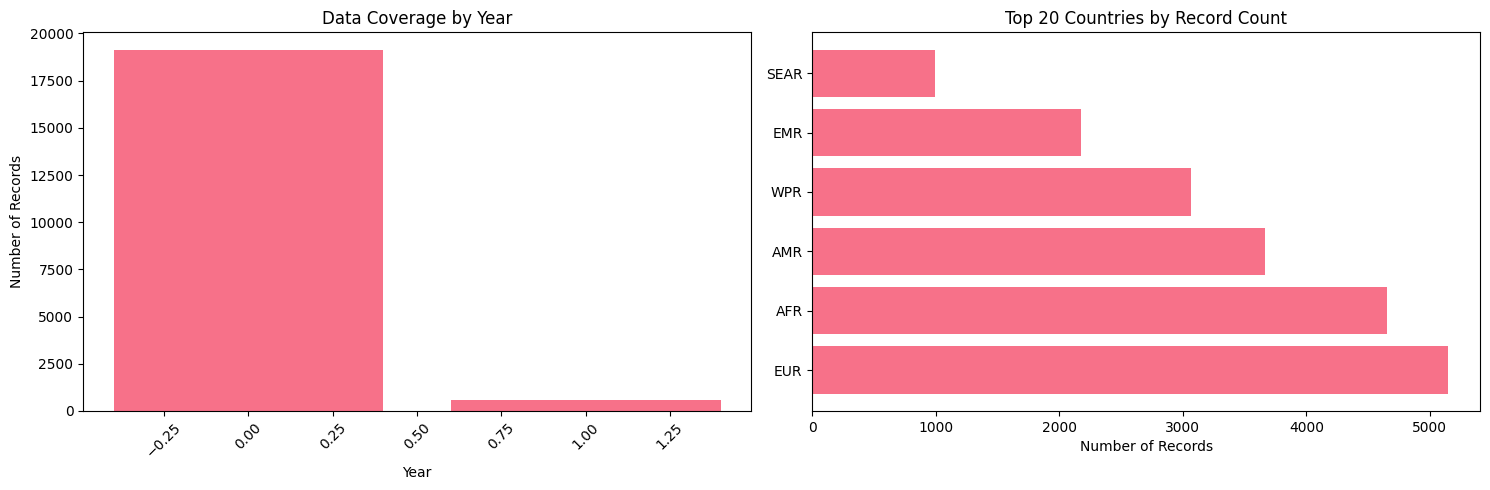

📊 Coverage visualizations created!


In [9]:
# Visualize Obesity data coverage
if obesity_df is not None:
    # Find relevant columns
    location_cols = [col for col in obesity_df.columns if any(x in col.lower() for x in ['country', 'location', 'area'])]
    year_cols = [col for col in obesity_df.columns if 'year' in col.lower()]
    value_cols = [col for col in obesity_df.columns if 'value' in col.lower() or 'obesity' in col.lower()]
    
    if location_cols and year_cols:
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        
        # Year distribution
        if year_cols:
            year_col = year_cols[0]
            year_counts = obesity_df[year_col].value_counts().sort_index()
            axes[0].bar(year_counts.index, year_counts.values)
            axes[0].set_title('Data Coverage by Year')
            axes[0].set_xlabel('Year')
            axes[0].set_ylabel('Number of Records')
            axes[0].tick_params(axis='x', rotation=45)
        
        # Top countries by record count
        if location_cols:
            loc_col = location_cols[0]
            country_counts = obesity_df[loc_col].value_counts().head(20)
            axes[1].barh(range(len(country_counts)), country_counts.values)
            axes[1].set_yticks(range(len(country_counts)))
            axes[1].set_yticklabels(country_counts.index)
            axes[1].set_title('Top 20 Countries by Record Count')
            axes[1].set_xlabel('Number of Records')
        
        plt.tight_layout()
        plt.show()
        
        print("📊 Coverage visualizations created!")


## 4. Data Quality Assessment

Identify potential issues that need to be addressed during preprocessing.


In [10]:
print("=" * 70)
print("DATA QUALITY ASSESSMENT")
print("=" * 70)

quality_issues = []

# Check FAO data
if fbs_df is not None:
    print("\n📋 FAO Food Balance Sheet:")
    
    # Check for missing values
    if fbs_df.isnull().sum().sum() > 0:
        total_missing = fbs_df.isnull().sum().sum()
        quality_issues.append(f"FAO: {total_missing:,} missing values")
        print(f"   ⚠️  Missing values: {total_missing:,}")
    else:
        print("   ✅ No missing values")
    
    # Check for duplicate rows
    if fbs_df.duplicated().sum() > 0:
        quality_issues.append(f"FAO: {fbs_df.duplicated().sum():,} duplicate rows")
        print(f"   ⚠️  Duplicate rows: {fbs_df.duplicated().sum():,}")
    else:
        print("   ✅ No duplicate rows")
    
    # Check data types
    if 'Year' in fbs_df.columns:
        if fbs_df['Year'].dtype == 'object':
            quality_issues.append("FAO: Year column is not numeric")
            print("   ⚠️  Year column needs conversion to numeric")
        else:
            print("   ✅ Year column is numeric")
    
    # Check for inconsistent country names
    if 'Area' in fbs_df.columns:
        areas_with_spaces = fbs_df['Area'].str.contains('  ', na=False).sum()
        if areas_with_spaces > 0:
            quality_issues.append(f"FAO: {areas_with_spaces} country names with extra spaces")
            print(f"   ⚠️  Country names with extra spaces: {areas_with_spaces}")
        else:
            print("   ✅ Country names look clean")

# Check Population data
if pop_df is not None:
    print("\n📋 FAO Population:")
    
    # Check format
    year_cols = [col for col in pop_df.columns if col.startswith('Y')]
    if year_cols:
        print(f"   ℹ️  Data is in WIDE format ({len(year_cols)} year columns)")
        print("   ⚠️  Needs transformation to LONG format during preprocessing")
        quality_issues.append("Population: Needs wide-to-long transformation")
    
    # Check for missing values
    if pop_df.isnull().sum().sum() > 0:
        total_missing = pop_df.isnull().sum().sum()
        quality_issues.append(f"Population: {total_missing:,} missing values")
        print(f"   ⚠️  Missing values: {total_missing:,}")
    else:
        print("   ✅ No missing values")

# Check Obesity data
if obesity_df is not None:
    print("\n📋 WHO Obesity:")
    
    # Check for missing values
    if obesity_df.isnull().sum().sum() > 0:
        total_missing = obesity_df.isnull().sum().sum()
        quality_issues.append(f"Obesity: {total_missing:,} missing values")
        print(f"   ⚠️  Missing values: {total_missing:,}")
    else:
        print("   ✅ No missing values")
    
    # Check for duplicate rows
    if obesity_df.duplicated().sum() > 0:
        quality_issues.append(f"Obesity: {obesity_df.duplicated().sum():,} duplicate rows")
        print(f"   ⚠️  Duplicate rows: {obesity_df.duplicated().sum():,}")
    else:
        print("   ✅ No duplicate rows")

# Summary
print("\n" + "=" * 70)
print("SUMMARY OF QUALITY ISSUES")
print("=" * 70)
if quality_issues:
    print(f"\n⚠️  Found {len(quality_issues)} potential issues:")
    for i, issue in enumerate(quality_issues, 1):
        print(f"   {i}. {issue}")
    print("\n💡 These will be addressed during preprocessing.")
else:
    print("\n✅ No major quality issues detected!")


DATA QUALITY ASSESSMENT

📋 FAO Food Balance Sheet:
   ⚠️  Missing values: 4,820,497
   ✅ No duplicate rows
   ✅ Year column is numeric
   ✅ Country names look clean

📋 FAO Population:
   ℹ️  Data is in WIDE format (151 year columns)
   ⚠️  Needs transformation to LONG format during preprocessing
   ⚠️  Missing values: 3,610

📋 WHO Obesity:
   ⚠️  Missing values: 216,711
   ✅ No duplicate rows

SUMMARY OF QUALITY ISSUES

⚠️  Found 4 potential issues:
   1. FAO: 4,820,497 missing values
   2. Population: Needs wide-to-long transformation
   3. Population: 3,610 missing values
   4. Obesity: 216,711 missing values

💡 These will be addressed during preprocessing.


## 5. Data Coverage Comparison

Compare coverage across datasets to understand what will be available in the final merged dataset.


In [11]:
print("=" * 70)
print("DATA COVERAGE COMPARISON")
print("=" * 70)

coverage_summary = []

# FAO coverage
if fbs_df is not None and 'Area' in fbs_df.columns and 'Year' in fbs_df.columns:
    fbs_countries = set(fbs_df['Area'].unique())
    fbs_years = set(fbs_df['Year'].unique())
    coverage_summary.append({
        'Dataset': 'FAO Food Balance Sheet',
        'Countries': len(fbs_countries),
        'Years': len(fbs_years),
        'Year Range': f"{min(fbs_years)}-{max(fbs_years)}"
    })

# Population coverage
if pop_df is not None and 'Area' in pop_df.columns:
    pop_countries = set(pop_df['Area'].unique())
    year_cols = [col for col in pop_df.columns if col.startswith('Y')]
    if year_cols:
        pop_years = set([int(col.replace('Y', '')) for col in year_cols])
        coverage_summary.append({
            'Dataset': 'FAO Population',
            'Countries': len(pop_countries),
            'Years': len(pop_years),
            'Year Range': f"{min(pop_years)}-{max(pop_years)}"
        })

# Obesity coverage
if obesity_df is not None:
    location_cols = [col for col in obesity_df.columns if any(x in col.lower() for x in ['country', 'location', 'area'])]
    year_cols = [col for col in obesity_df.columns if 'year' in col.lower()]
    if location_cols and year_cols:
        loc_col = location_cols[0]
        year_col = year_cols[0]
        ob_countries = set(obesity_df[loc_col].dropna().unique())
        ob_years = set(obesity_df[year_col].dropna().unique())
        coverage_summary.append({
            'Dataset': 'WHO Obesity',
            'Countries': len(ob_countries),
            'Years': len(ob_years),
            'Year Range': f"{int(min(ob_years))}-{int(max(ob_years))}"
        })

# Display summary
if coverage_summary:
    coverage_df = pd.DataFrame(coverage_summary)
    display(coverage_df)
    
    # Estimate final panel coverage
    if len(coverage_summary) >= 2:
        print("\n📊 Estimated Final Panel Coverage:")
        print("   (Based on intersection of all datasets)")
        
        # Find common countries (if possible)
        if fbs_df is not None and pop_df is not None:
            common_countries = fbs_countries.intersection(pop_countries)
            if obesity_df is not None and location_cols:
                loc_col = location_cols[0]
                ob_countries = set(obesity_df[loc_col].dropna().unique())
                common_countries = common_countries.intersection(ob_countries)
            print(f"   Estimated countries: ~{len(common_countries)} (intersection)")
        
        # Find common years
        if fbs_df is not None and pop_df is not None:
            common_years = fbs_years.intersection(pop_years)
            if obesity_df is not None and year_cols:
                year_col = year_cols[0]
                ob_years = set(obesity_df[year_col].dropna().unique())
                common_years = common_years.intersection(ob_years)
            print(f"   Estimated years: ~{len(common_years)} (intersection)")
            if common_years:
                print(f"   Year range: {min(common_years)}-{max(common_years)}")
        
        print("\n💡 Note: Actual coverage may vary after data cleaning and filtering.")
else:
    print("⚠️  Could not compare coverage - check data loading above.")


DATA COVERAGE COMPARISON


,Dataset,Countries,Years,Year Range
0,FAO Food Balance Sheet,213,14,2010-2023
1,FAO Population,34,151,1950-2100
2,WHO Obesity,6,2,0-1



📊 Estimated Final Panel Coverage:
   (Based on intersection of all datasets)
   Estimated countries: ~0 (intersection)
   Estimated years: ~0 (intersection)

💡 Note: Actual coverage may vary after data cleaning and filtering.
